<a href="https://colab.research.google.com/github/Ericknht/PracticalFoundationAI/blob/main/arboles_creacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # para generar visualizaciones
import re # Para poder generar y poder leer la información
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set() # Inicializamos seaborn, para que esté listo y podamos graficar.


In [ ]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
cols = train_df.columns
for col in cols:
  print(f"{col} {train_df[col].isnull().sum()}")
train_df['Survived'].isnull().any().sum()
#train_df['Age'].isnull().any().sum()
pd.Series([True, None, None]).isnull().sum()

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


2

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


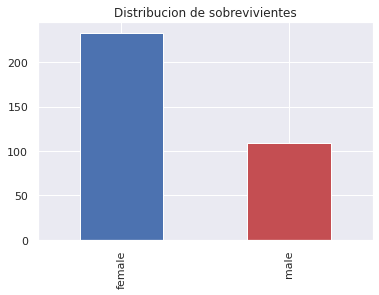

female    233
male      109
Name: Sex, dtype: int64


In [ ]:
survived_df = train_df['Survived'] == 1
survived_by_sex = train_df[survived_df].Sex.value_counts()
survived_by_sex.plot(kind='bar', color=['b', 'r'])
plt.title('Distribucion de sobrevivientes')
plt.show()
print(survived_by_sex)

In [ ]:
from sklearn import preprocessing

def _encoder_columns(df, column):
  label_encoder = preprocessing.LabelEncoder()
  encoder_column = label_encoder.fit_transform(train_df[column])
  df[column] = encoder_column
  
  return df

In [ ]:
def _fillna_for_median(df, column):
  df[column] = df[column].fillna(df[column].median())

  return df

In [ ]:
def _fillna_for_string(df, column, character):
  df[column] = df[column].fillna(character)

  return df

In [ ]:
def _drop_columns(df, columns = []):
  df_drop_columns = df.drop(columns, axis=1)

  return df_drop_columns

In [ ]:
def _detect_categorical_cols(df):
  categorical_cols = [cname for cname in df.columns if 
                      df[cname].nunique() < 10 and
                      df[cname].dtype == 'object'
                    ]
  
  return categorical_cols

In [ ]:
def _detect_numerical_cols(df):
  numerical_cols = [cname for cname in df.columns if 
                      df[cname].dtype in ['int64', 'float64', 'int32']
                    ]
  
  return numerical_cols

In [ ]:
def _reorder_df(df):
  categorical_cols = _detect_categorical_cols(df)
  numerical_cols = _detect_numerical_cols(df)

  selected_cols = categorical_cols + numerical_cols
  return df[selected_cols]

In [ ]:
def _get_dummies_df(df):
  dummy_encoded_df = pd.get_dummies(df)
  
  return dummy_encoded_df

In [ ]:
def _get_y(df, column):

  return df[column].values

In [ ]:
def _get_x(df, col_median, col_str, char_str, cols_drop, col_encoder = None):
  if col_encoder:
    df = _encoder_columns(df, col_encoder)
  df = _fillna_for_median(df, col_median)
  df = _fillna_for_string(df, col_str, char_str)
  df = _drop_columns(df, cols_drop)
  df = _reorder_df(df)
  df = _get_dummies_df(df)

  return df.values

In [ ]:
y_target_func = _get_y(train_df, 'Survived')
x_features_one_func = _get_x(train_df, 'Age', 'Embarked', 'S', ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], 'Sex')

In [ ]:

label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
#train_df['Sex'] = encoder_sex
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [ ]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
categorical_cols = [cname for cname in train_predictors.columns if 
                      train_predictors[cname].nunique() < 10 and
                      train_predictors[cname].dtype == 'object'
                    ]

In [ ]:
train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,S
887,1,0,19.0,0,0,30.0000,S
888,3,0,28.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [ ]:
train_predictors['Sex'].nunique()

2

In [ ]:
train_predictors['Age'].dtype

dtype('float64')

In [ ]:
train_predictors['Sex'].dtype == 'object'

False

In [ ]:
categorical_cols

['Embarked']

In [ ]:
numerical_cols = [cname for cname in train_predictors.columns if 
                      train_predictors[cname].dtype in ['int64', 'float64']
                    ]

In [ ]:
numerical_cols

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
my_cols = categorical_cols + numerical_cols

train_predictors = train_predictors[my_cols]
train_predictors

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare
0,S,3,1,22.0,1,0,7.2500
1,C,1,0,38.0,1,0,71.2833
2,S,3,0,26.0,0,0,7.9250
3,S,1,0,35.0,1,0,53.1000
4,S,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,S,2,1,27.0,0,0,13.0000
887,S,1,0,19.0,0,0,30.0000
888,S,3,0,28.0,1,2,23.4500
889,C,1,1,26.0,0,0,30.0000


In [ ]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

In [ ]:
# random_state = 1, hace que cada vez que carguemos esto va a ser un split distinto aleatorio.
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size=.25, random_state=1)

In [ ]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [ ]:
tree_one_acurracy = round(tree_one.score(x_train, y_train), 4)
print('Acurraci: %0.4f' % (tree_one_acurracy))

Acurraci: 0.9895


In [ ]:
from io import StringIO
from IPython.display import Image, display
import pydotplus # Es el que nos va a permitir generar cada uno de los caminos que tenemos

out = StringIO() # Nos permitirá generar un archivo
tree.export_graphviz(tree_one, out_file=out) # Vamos a crear una graficación

graph = pydotplus.graph_from_dot_data(out.getvalue()) # Genera cada una de las ramas que tenemos.
graph.write_png('titanic.png')

True